In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [334]:
# %%capture
# !pip install openpyxl

In [335]:
# T5 for quaterly data
# https://www.singstat.gov.sg/whats-new/latest-news/cpi-highlights.
df = pd.read_excel('cpiapr24.xlsx',sheet_name='T5')

# 1. Data Cleaning

In [336]:
# Drop unwanted rows
rows_to_drop = [0,1,2,3]
df = df.drop(rows_to_drop)

In [337]:
# Reset the index and set the specified row as the header
header_row = 4
df.columns = df.iloc[header_row - len(rows_to_drop)]
df = df[header_row + 1 - len(rows_to_drop):]

In [338]:
df = df.reset_index(drop=True)
df.index.name = None

In [339]:
# Drop unwanted rows
df = df.drop(df.index[152:])

In [340]:
df = df.set_index('Variables').transpose()

In [341]:
#df.to_csv('cpi.csv')

In [342]:
df = pd.read_csv('cpi.csv')

In [343]:
df.head()

,Period,All Items,Food,Food Excl Food Serving Services,Bread & Cereals,Rice,Flour,Bread,Noodles & Pasta,Biscuits & Cookies,...,Spirits & Wine,Beer,Cigarettes,Personal Effects,Jewellery & Watches,Other Personal Effects,Social Services,Other Miscellaneous Services,All Items Less Imputed Rentals On Owner-occupied Accommodation3,All Items Less Accommodation3
0,1961 Q1,24.564,21.786,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
1,1961 Q2,24.154,21.127,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
2,1961 Q3,24.395,21.509,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
3,1961 Q4,24.490,21.665,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
4,1962 Q1,24.616,21.844,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na


### Since we are only analysing a decade worth of data, we sliced the dataset from 2014 Q1 to 2024 Q1

In [344]:
df.set_index("Period",inplace=True)
df = df.loc["2004 Q1":"2024 Q1"]
df.reset_index(inplace=True)

In [345]:
df

,Period,All Items,Food,Food Excl Food Serving Services,Bread & Cereals,Rice,Flour,Bread,Noodles & Pasta,Biscuits & Cookies,...,Spirits & Wine,Beer,Cigarettes,Personal Effects,Jewellery & Watches,Other Personal Effects,Social Services,Other Miscellaneous Services,All Items Less Imputed Rentals On Owner-occupied Accommodation3,All Items Less Accommodation3
0,2004 Q1,76.135,69.939,66.382,67.325,na,na,na,na,na,...,na,na,na,97.11,na,na,na,na,na,76.161
1,2004 Q2,76.486,69.850,66.077,67.808,na,na,na,na,na,...,na,na,na,95.903,na,na,na,na,na,76.337
2,2004 Q3,76.744,70.411,67.241,68.016,na,na,na,na,na,...,na,na,na,94.015,na,na,na,na,na,76.54
3,2004 Q4,76.708,70.820,67.615,68.257,na,na,na,na,na,...,na,na,na,93.143,na,na,na,na,na,76.476
4,2005 Q1,76.336,71.052,68.095,68.537,na,na,na,na,na,...,na,na,na,92.056,na,na,na,na,na,76.402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2023 Q1,112.000,113.935,114.913,111.782,97.952,107.004,113.352,116.398,118.749,...,97.681,99.955,109.576,97.839,95.296,99.134,93.861,95.49,112.404,112.723
77,2023 Q2,113.093,114.933,115.628,113.577,101.507,111.183,115.247,117.67,119.711,...,100.329,103.678,115.09,96.941,92.836,99.032,94.02,95.654,113.494,113.951
78,2023 Q3,114.164,115.474,116.007,114.407,102.124,108.529,116.757,116.966,120.504,...,102.3,103.218,115.09,97.537,97.234,97.692,93.681,94.751,114.52,114.847
79,2023 Q4,115.121,116.148,116.452,115.926,103.928,107.265,118.922,118.253,121.134,...,103.291,102.07,115.09,96.952,99.021,95.897,93.818,94.722,115.476,115.813


In [346]:
any(df.isna().sum())

False

In [347]:
df.columns = df.columns.str.strip()

In [348]:
df.columns

Index(['Period', 'All Items', 'Food', 'Food Excl Food Serving Services',
       'Bread & Cereals', 'Rice', 'Flour', 'Bread', 'Noodles & Pasta',
       'Biscuits & Cookies',
       ...
       'Spirits & Wine', 'Beer', 'Cigarettes', 'Personal Effects',
       'Jewellery & Watches', 'Other Personal Effects', 'Social Services',
       'Other Miscellaneous Services',
       'All Items Less Imputed Rentals On Owner-occupied Accommodation3',
       'All Items Less Accommodation3'],
      dtype='object', length=153)

In [349]:
df.to_csv('cpi_quarterly_two_decade_24.csv',index=False)

## 2. Analysing CPI with price indices

### CPI trend from 2014 to 2024 for each quarters (Q1 to Q4)

In [363]:
df = pd.read_csv('cpi_quarterly_decade_24.csv')

In [364]:
df.columns

Index(['Period', 'All Items', 'Food', 'Food Excl Food Serving Services',
       'Bread & Cereals', 'Rice', 'Flour', 'Bread', 'Noodles & Pasta',
       'Biscuits & Cookies',
       ...
       'Spirits & Wine', 'Beer', 'Cigarettes', 'Personal Effects',
       'Jewellery & Watches', 'Other Personal Effects', 'Social Services',
       'Other Miscellaneous Services',
       'All Items Less Imputed Rentals On Owner-occupied Accommodation3',
       'All Items Less Accommodation3'],
      dtype='object', length=153)

In [366]:
df.isna().sum()

Period                                                             0
All Items                                                          0
Food                                                               0
Food Excl Food Serving Services                                    0
Bread & Cereals                                                    0
                                                                  ..
Other Personal Effects                                             0
Social Services                                                    0
Other Miscellaneous Services                                       0
All Items Less Imputed Rentals On Owner-occupied Accommodation3    0
All Items Less Accommodation3                                      0
Length: 153, dtype: int64

## 2. Analysing CPI Trends - EDA

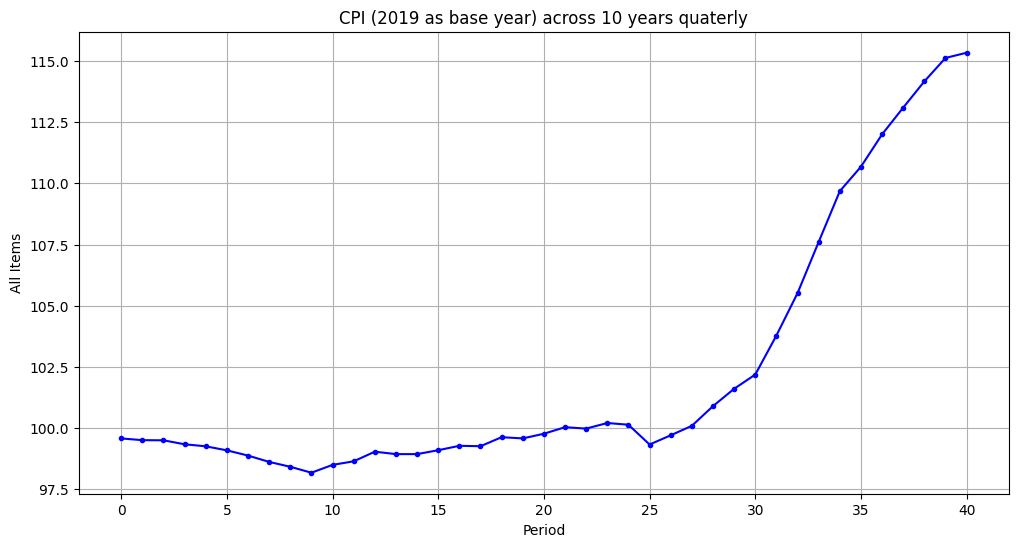

In [367]:
# Plotting the time series for 'All Items'
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['All Items'], marker='.', linestyle='-', color='b')

# Adding titles and labels
plt.title('CPI (2019 as base year) across 10 years quaterly')
plt.xlabel('Period')
plt.ylabel('All Items')

# Displaying the plot
plt.grid(True)
plt.show()

In [312]:
# # Create an interactive time series plot for 'All Items' using Plotly Express
# fig = px.line(df, x='Period', y='All Items', title='CPI (2019 as base year) 2004 - 2024 Quarterly')
# fig.update_xaxes(title_text='Period')
# fig.update_yaxes(title_text='All Items')

# # Show plot
# fig.show()

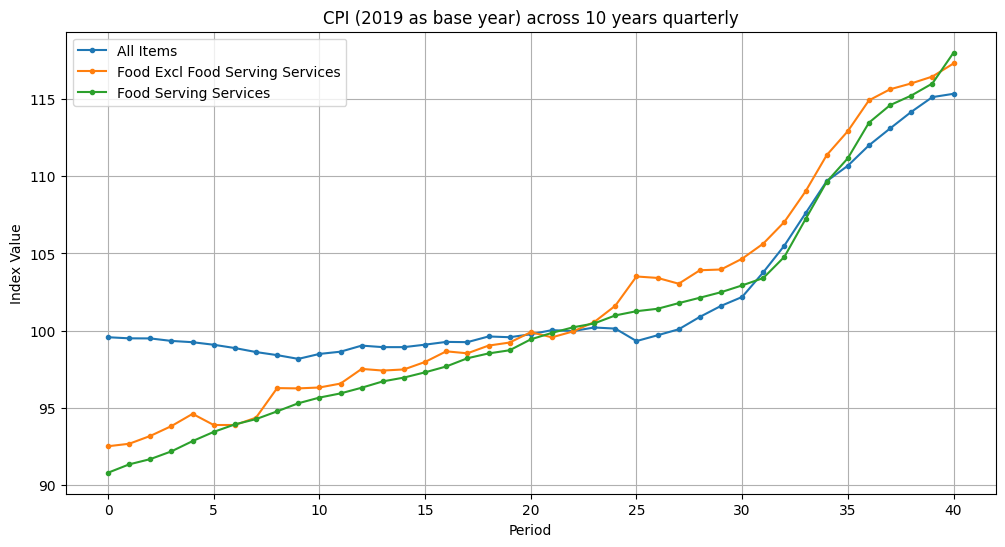

In [378]:
# Plotting the time series for 'All Items' and 'Food'
plt.figure(figsize=(12, 6))

for column in ['All Items', 'Food Excl Food Serving Services', 'Food Serving Services']:
    plt.plot(df.index, df[column], marker='.', linestyle='-', label=column)

# Adding titles and labels
plt.title('CPI (2019 as base year) across 10 years quarterly')
plt.xlabel('Period')
plt.ylabel('Index Value')

# Adding legend
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

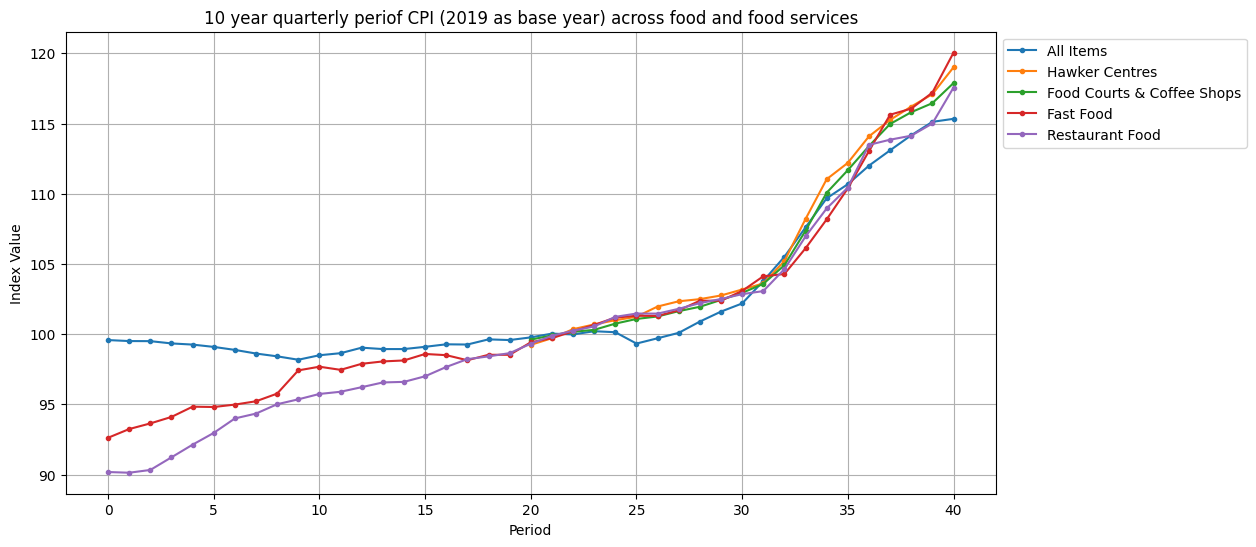

In [381]:
# Find the index of the first non-zero value for each column
first_nonzero_index = df.apply(lambda x: np.argmax(x != 0))

# Plotting the time series for food service categories starting from the first non-zero index
plt.figure(figsize=(12, 6))

for column in ['All Items','Hawker Centres', 'Food Courts & Coffee Shops', 'Fast Food', 'Restaurant Food']:
    start_index = first_nonzero_index[column]
    plt.plot(df.index[start_index:], df[column].iloc[start_index:], marker='.', linestyle='-', label=column)

# Adding titles and labels
plt.title('10 year quarterly periof CPI (2019 as base year) across food and food services')
plt.xlabel('Period')
plt.ylabel('Index Value')

# Adding legend with better layout
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Displaying the plot
plt.grid(True)
plt.show()

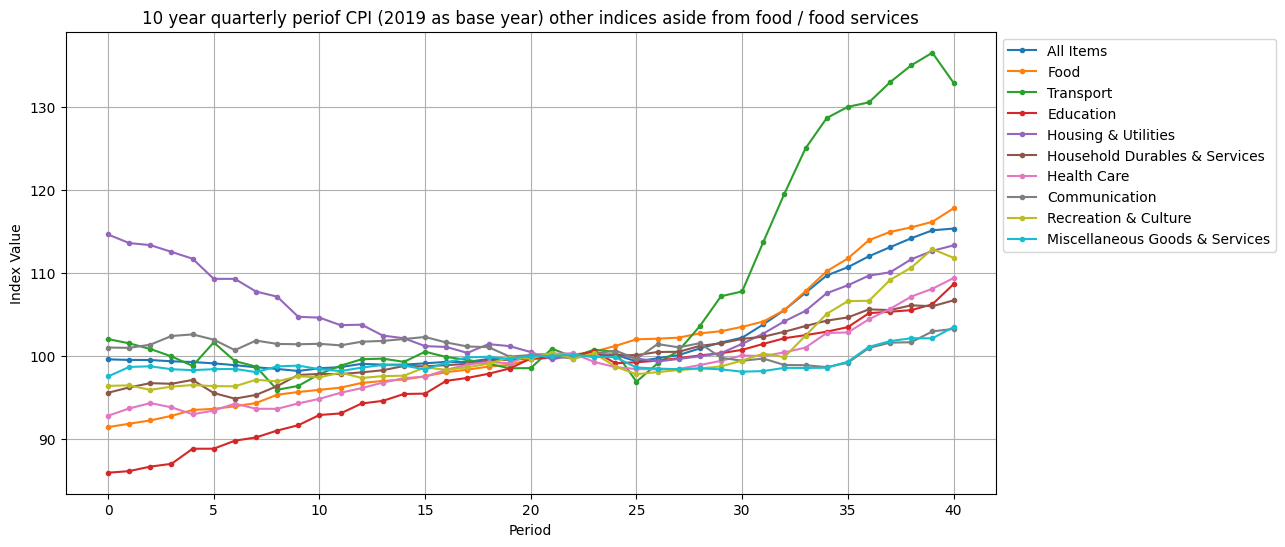

In [384]:
# Find the index of the first non-zero value for each column
first_nonzero_index = df.apply(lambda x: np.argmax(x != 0))

# Plotting the time series for food service categories starting from the first non-zero index
plt.figure(figsize=(12, 6))

for column in ['All Items','Food','Transport', 
               'Education', 'Housing & Utilities',
               'Household Durables & Services',
               'Health Care', 'Communication',
               'Recreation & Culture',
               'Miscellaneous Goods & Services']:
    
    start_index = first_nonzero_index[column]
    plt.plot(df.index[start_index:], df[column].iloc[start_index:], marker='.', linestyle='-', label=column)

# Adding titles and labels
plt.title('10 year quarterly periof CPI (2019 as base year) other indices aside from food / food services')
plt.xlabel('Period')
plt.ylabel('Index Value')

# Adding legend with better layout
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Displaying the plot
plt.grid(True)
plt.show()

In [387]:
df.head()

,Period,All Items,Food,Food Excl Food Serving Services,Bread & Cereals,Rice,Flour,Bread,Noodles & Pasta,Biscuits & Cookies,...,Spirits & Wine,Beer,Cigarettes,Personal Effects,Jewellery & Watches,Other Personal Effects,Social Services,Other Miscellaneous Services,All Items Less Imputed Rentals On Owner-occupied Accommodation3,All Items Less Accommodation3
0,2014 Q1,99.580,91.417,92.525,93.498,93.882,101.517,93.209,101.033,90.780,...,104.676,99.410,85.664,98.871,100.560,98.489,94.043,97.549,95.811,95.382
1,2014 Q2,99.509,91.823,92.685,94.030,95.773,102.692,93.134,100.584,92.454,...,107.345,108.250,90.940,98.651,100.560,98.220,94.043,97.567,95.813,95.592
2,2014 Q3,99.503,92.223,93.193,94.177,95.561,100.796,93.133,99.363,92.923,...,104.341,107.431,90.940,99.127,100.455,98.827,95.382,97.861,95.946,95.653
3,2014 Q4,99.341,92.773,93.831,94.779,96.845,101.530,93.284,100.339,94.753,...,104.930,107.093,90.940,97.991,101.375,97.227,96.051,97.804,95.931,95.636
4,2015 Q1,99.258,93.481,94.621,95.162,94.662,99.857,94.592,99.661,94.486,...,103.347,108.158,90.940,97.654,101.991,96.676,96.708,97.882,95.991,95.572


In [396]:
categories = ['All Items','Food','Transport',
              'Education', 'Housing & Utilities',
              'Household Durables & Services',
              'Health Care', 'Communication',
              'Recreation & Culture',
              'Miscellaneous Goods & Services']

df_cat = df[categories]

#df_cat.head()

In [397]:
corr_matrix = df_cat.corr()

In [399]:
corr_matrix.head(5)

,All Items,Food,Transport,Education,Housing & Utilities,Household Durables & Services,Health Care,Communication,Recreation & Culture,Miscellaneous Goods & Services
All Items,1.000000,0.933429,0.987574,0.740214,0.440142,0.891791,0.875640,-0.019652,0.961133,0.718074
Food,0.933429,1.000000,0.906835,0.922051,0.103617,0.979027,0.958830,-0.142070,0.938585,0.714561
Transport,0.987574,0.906835,1.000000,0.707584,0.447356,0.873516,0.831597,-0.092790,0.920425,0.621545
Education,0.740214,0.922051,0.707584,1.000000,-0.265878,0.940372,0.941002,-0.291783,0.799843,0.647862
Housing & Utilities,0.440142,0.103617,0.447356,-0.265878,1.000000,0.018237,0.014410,0.381202,0.314555,0.220628


In [400]:
# Extracting correlations with "All Items"
corr_with_all_items = corr_matrix[['All Items']]

In [401]:
corr_with_all_items

,All Items
All Items,1.000000
Food,0.933429
Transport,0.987574
Education,0.740214
Housing & Utilities,0.440142
Household Durables & Services,0.891791
Health Care,0.875640
Communication,-0.019652
Recreation & Culture,0.961133
Miscellaneous Goods & Services,0.718074


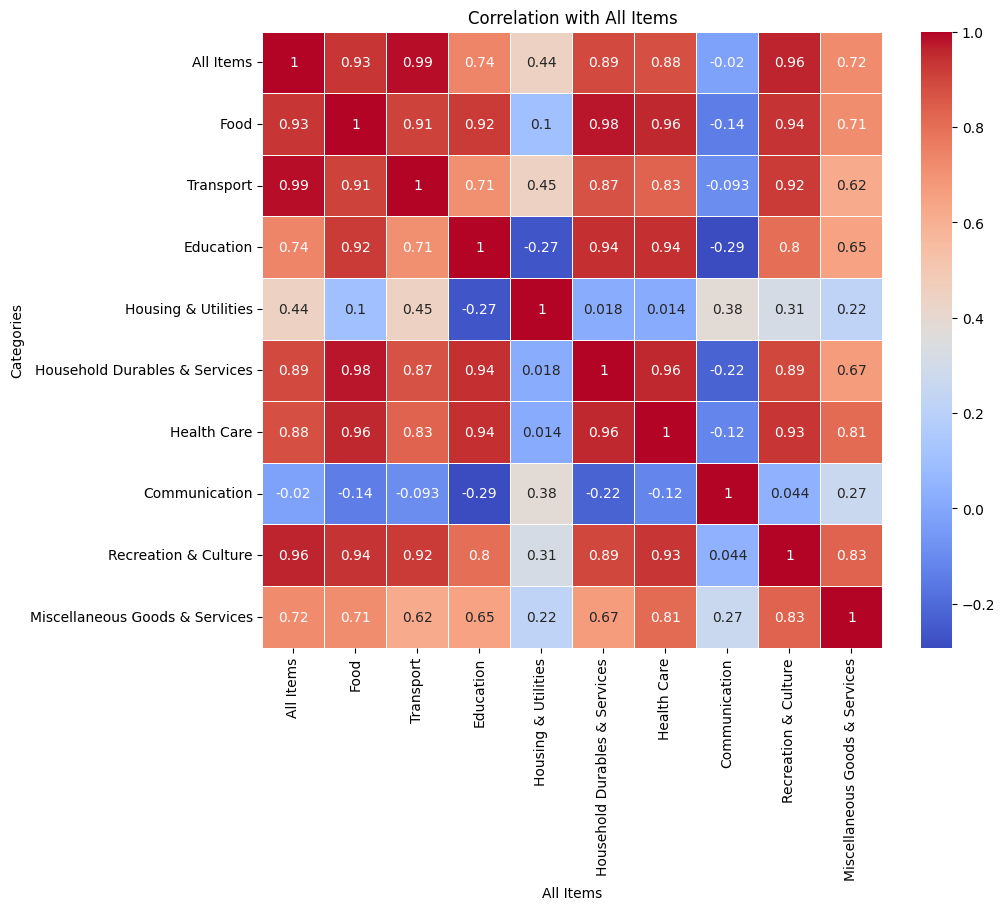

In [404]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)

# Adding title and labels
plt.title('Correlation with All Items')
plt.xlabel('All Items')
plt.ylabel('Categories')

# Displaying the heatmap
plt.show()